<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
## openEO Platform: Sentinel 1 Cross Polarization Ratio

Creating a Sentinel 1 Cross Polarization Ratio. Basis for identify surface types - or input into delineation algorithms.

In [17]:
import openeo
import matplotlib.pyplot as plt
import xarray as xr

from pathlib import PosixPath
from eo_utils import openeoMap 
from openeo.util import to_bbox_dict

In [2]:
conn = openeo.connect("openeo.cloud")
conn.authenticate_oidc(provider_id="egi")

Authenticated using refresh token.


<Connection to 'https://openeocloud.vito.be/openeo/1.0.0/' with OidcBearerAuth>

In [26]:
conn.describe_account()['default_plan']

'free'

In [3]:
center = [48.267807, 16.630029]
zoom = 11.5
eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[48.267807, 16.630029], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

## Product selection

In [4]:
conn.list_collections()

[{'description': 'Sentinel 1 GRD Sigma0, mosaic of all ascending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_ASCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'Sentinel 1 GRD Sigma0, mosaic of all descending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_DESCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'FAPAR Level-3 product at 10m resolution. Covers selected areas globally. This FAPAR is derived directly from ESA L2A products. The FAPAR quantifies the fraction of the solar radiation absorbed by live leaves for the photosynthesis activity. Then, it refers only to the green and alive elements of the canopy. The FAPAR depends on the canopy structure, vegetation element optical properties, atmospheric conditions, and angular configuration. \n\nFAPAR is recognized as an Essential Climate Variable (ECV) by the Global Climate Observing System (GCOS).',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_FAPAR_V2',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-2',
   'MSI',
   'Level-3',
   'Radiometry',
   'Plant Resource',
   'FAPAR'],
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_FAPAR',
    'rel': 'alternate',
    'title': 'Terrascope Viewer'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S2_FAPAR'}],
  'providers': [{'name': 'VITO, on

In [22]:
conn.describe_collection("SENTINEL1_SIGMA0_20M")

{'cube:dimensions': {'bands': {'type': 'bands', 'values': ['VV', 'VH']},
  't': {'extent': [['2015-01-05T04:32:37', '2022-05-09T04:41:35']],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [4200000.0, 8100000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [900000.0, 6900000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'description': 'Sentinel-1 Sigma0 VV and VH, backscatter returned to the satellites antenna from a unit area on ground, calibrated, georeferenced, geolocation corrected, thermal and border-noise removed. The Sigma0 collection at EODC is stored in the EQUI7 tile grid. For more infromation about the Sigma0 collection, see [here](https://www.mdpi.com/2072-4292/13/22/4622). ARD data can only be combined with other ARD data or loaded results of previous processed jobs. ARD data cannot be combined with Level-1 collections! As this is Level-2 (ARD) data, ARD processes (``ard_normalized_radar_backscatter()``, ``ard_surface_reflectance()``, ``sar_backscatter()``, ``atmospheric_correction()``) cannot be applied.',
 'extent': {'spatial': {'bbox': [[-55.654826212327706,
     -4.847103632477972,
     18.510048506404665,
     52.30655651888066]]},
  'temporal': {'interval': [['2015-01-05T04:32:37Z',
     '2022-05-09T04:41:35Z']]}},
 'id': 'SENTINEL1_SIGMA0_20M',
 'item_assets': {},
 'keywords': ['EODC', 'backscatter', 'ESA', 'ARD', 'Sentinel-1', 'Level-2'],
 'license': 'proprietary',
 'links': [{'href': 'https://openeo.eodc.euv1.0', 'rel': 'root'},
  {'href': 'https://openeo.eodc.euv1.0/collections', 'rel': 'parent'},
  {'href': 'https://openeo.eodc.euv1.0/collections/SENTINEL1_SIGMA0_20M',
   'rel': 'self'},
  {'href': 'https://openeo.eodc.euv1.0/collections/SENTINEL1_SIGMA0_20M/items',
   'rel': 'items'}],
 'properties': {'platform': 'Sentinel-1'},
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.0.0/schema.json',
  'https://stac-extensions.github.io/item-assets/v1.0.0/schema.json',
  'https://github.com/stac-extensions/eo'],
 'stac_version': '1.0.0',
 'summaries': {'constellation': {},
  'eo:bands': [{'common_name': 'Band1', 'name': 'VV'},
   {'common_name': 'Band2', 'name': 'VH'}],
  'odc:file_format': {'0': 'MultiFileGeoTiffProduct'},
  'odc:product_family': {'0': 'level2'},
  'platform': {'0': 'Sentinel-1'}},
 'title': 'EODC Sigma0 Sentinel-1 at 20m resolution',
 'type': 'Collection'}

In [6]:
collection      = 'SENTINEL1_SIGMA0_20M'

spatial_extent  = to_bbox_dict(eoMap.getBbox())
temporal_extent = ["2020-01-01", "2020-12-31"] 

bands           = ["VV", "VH"] 

data = conn.load_collection(collection, spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

In [7]:
data_aggregate_mean = data.aggregate_temporal_period(reducer="mean", period="month", dimension="t")
cross_polirization_ratio = data_aggregate_mean.band("VV").subtract(data_aggregate_mean.band("VH"))

In [8]:
cross_polirization = cross_polirization_ratio.add_dimension(name='bands', label='cross_pol')
merged_cubes = data_aggregate_mean.merge_cubes(cross_polirization)

In [9]:
data_saved = merged_cubes.save_result(format="NetCDF")

In [10]:
data_saved.graph

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'bands': ['VV', 'VH'],
   'id': 'SENTINEL1_SIGMA0_20M',
   'spatial_extent': {'west': 16.461982727050785,
    'south': 48.22215660689869,
    'east': 16.797752380371097,
    'north': 48.31356955685135},
   'temporal_extent': ['2020-01-01', '2020-12-31']}},
 'aggregatetemporalperiod1': {'process_id': 'aggregate_temporal_period',
  'arguments': {'data': {'from_node': 'loadcollection1'},
   'dimension': 't',
   'period': 'month',
   'reducer': {'process_graph': {'mean1': {'process_id': 'mean',
      'arguments': {'data': {'from_parameter': 'data'}},
      'result': True}}}}},
 'reducedimension1': {'process_id': 'reduce_dimension',
  'arguments': {'data': {'from_node': 'aggregatetemporalperiod1'},
   'dimension': 'bands',
   'reducer': {'process_graph': {'arrayelement1': {'process_id': 'array_element',
      'arguments': {'data': {'from_parameter': 'data'}, 'index': 0}},
     'arrayelement2': {'process_id': 'array_elemen

In [11]:
job_ard = data_saved.create_job(title="Sigma0 X-Pol East Vienna 2020")
job_ard.start_job()
print(f"Started job {job_ard.job_id}")

print(f"Batch job {job_ard.job_id} status: {job_ard.status()}")

Started job eodc-jb-31f8511c-6ccc-4d27-bdbf-4ba892ed7525
Batch job eodc-jb-31f8511c-6ccc-4d27-bdbf-4ba892ed7525 status: running


In [13]:
job_ard = conn.job(job_ard.job_id)
job_description_ard = job_ard.describe_job()
print("Batch job with id: ",job_ard.job_id, ' is ',job_description_ard['status'])

Batch job with id:  eodc-jb-31f8511c-6ccc-4d27-bdbf-4ba892ed7525  is  running


### Results Download

In [15]:
yesterday_id = 'eodc-jb-0d90bf4e-a521-48a0-b69d-985ce616b4ae'
job_ard = conn.job(yesterday_id)
results_ard = job_ard.get_results()

In [18]:
results = results_ard.download_files("./demo")
results.remove(PosixPath('demo/job-results.json'))
output_data = xr.open_mfdataset(results, engine='netcdf4')
output_data

<xarray.Dataset>
Dimensions:      (month: 12, y: 633, x: 1292)
Coordinates:
  * y            (y) float64 1.629e+06 1.629e+06 ... 1.616e+06 1.616e+06
  * x            (x) float64 5.278e+06 5.278e+06 ... 5.303e+06 5.303e+06
    spatial_ref  int32 0
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
    t            datetime64[ns] 2022-05-23T12:18:00.012746
Data variables:
    VH           (month, y, x) float64 dask.array<chunksize=(12, 633, 1125), meta=np.ndarray>
    VV           (month, y, x) float64 dask.array<chunksize=(12, 633, 1125), meta=np.ndarray>
    cross_pol    (month, y, x) float64 dask.array<chunksize=(12, 633, 1125), meta=np.ndarray>
Attributes:
    nodata:             -9999
    crs:                PROJCRS["Azimuthal_Equidistant",BASEGEOGCRS["WGS 84",...
    datetime_from_dim:  2022-05-23 12:18:00.016519

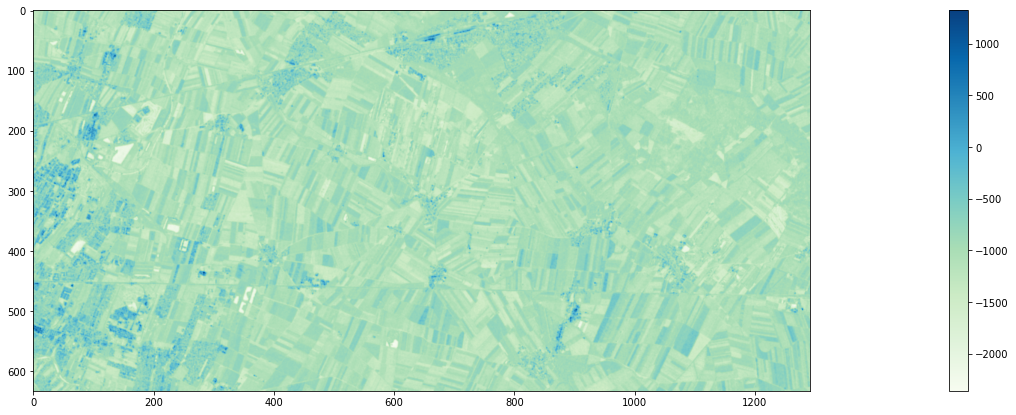

In [42]:
plt.figure(figsize=(50,7))
plt.subplot(1,1,1)
plt.imshow(output_data.VV[7].values, cmap = "GnBu")   
plt.colorbar()

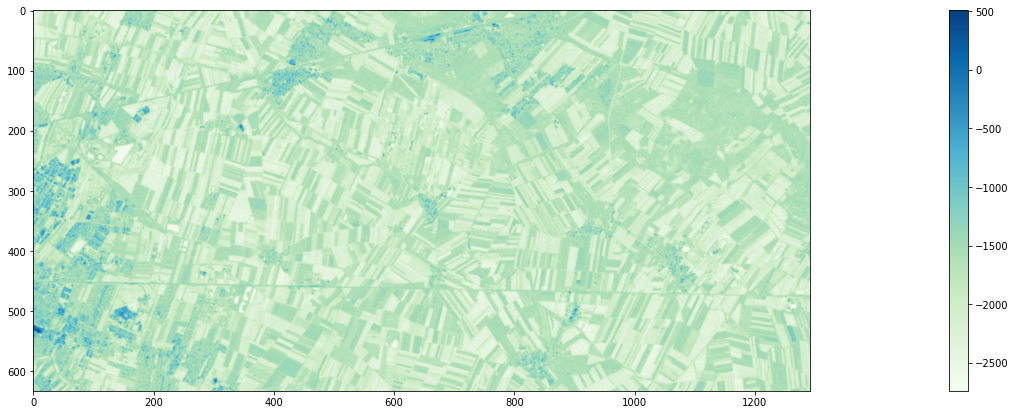

In [41]:
plt.figure(figsize=(50,7))
plt.subplot(1,1,1)
plt.imshow(output_data.VH[7].values, cmap = "GnBu")   
plt.colorbar()

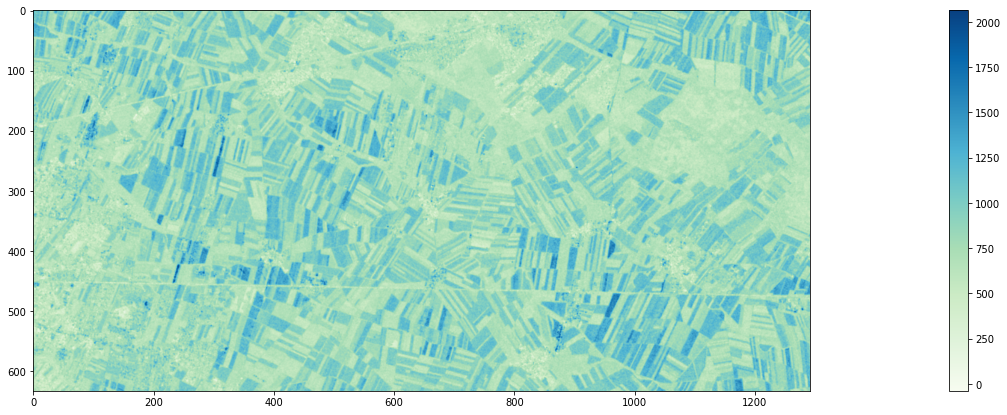

In [43]:
june = output_data.cross_pol[7].values
plt.figure(figsize=(50,7))
month = june
plt.subplot(1,1,1)
plt.imshow(month, cmap = "GnBu")   
plt.colorbar()

# References

Sentinel-1 Cross Ratio and Vegetation Optical Depth: https://www.mdpi.com/2072-4292/12/20/3404/html

Sentinel-1 Polarimetry: https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-1-sar/product-overview/polarimetry

SIGMA0 Handook: https://earth.esa.int/eogateway/documents/20142/37627/ASAR-Product-Handbook.pdf#eph.asar.gloss.prodt:SIGMA

### Notes

VV - VH in terms of VV/VH.

The sigm0_VV and simga0_VH are in dB unit, which are:

log10(VV_backscatter_in_linear_unit) and log10(VH_backscatter_in_linear_unit)

respectively, so, 

sigma0_VV - sigma0_VH = log10(VV_backscatter_in_linear_unit) - log10(VH_backscatter_in_linear_unit) = log10(VV_backscatter_in_linear_unit / VH_backscatter_in_linear_unit).

Therefore, we can use simga0 VV - VH in dB unit to represent the ratio VV/VH in linear unit.

### Coordinates for African and South American tiles

SA020M_E078N066T3: (-55.654826, -4.847103, -52.934297, -2.086411)

AF020M_E048N054T3: (14.085332, 3.103121, 16.815485, 5.846286)